# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhamad Wisnu Mubarok
- **Email:** wisnumubarok2002@gmail.com
- **ID Dicoding:** wisnumubarok26

## Menentukan Pertanyaan Bisnis

- Pada musim apa peminjaman sepeda yang paling banyak dan sedikit?
- Bagaimana perbandingan peminjaman sepeda antara 2011 dan 2012

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Data Wrangling

### Gathering Data

In [ ]:
data_day = pd.read_csv("day.csv", index_col='instant')
data_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [ ]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.4+ KB


In [9]:
data_day.describe(include='all')

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [11]:
data_day.duplicated().sum()

0

In [14]:
data_day.isna().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data

In [18]:
data1 = data_day[['season','casual','registered','cnt']]

,season,casual,registered,cnt
instant,,,,
1,1,331,654,985
2,1,131,670,801
3,1,120,1229,1349
4,1,108,1454,1562
5,1,82,1518,1600


In [62]:
data_day['yr'] = data_day['yr'].replace({0: 2011, 1: 2012})

## Exploratory Data Analysis (EDA)

### Explore ...

In [20]:
data1.head()

,season,casual,registered,cnt
instant,,,,
1,1,331,654,985
2,1,131,670,801
3,1,120,1229,1349
4,1,108,1454,1562
5,1,82,1518,1600


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
172,2011-06-21,3,0,6,0,2,1,2,0.680833,0.637646,0.770417,0.171025,774,4061,4835
173,2011-06-22,3,0,6,0,3,1,1,0.733333,0.693829,0.707500,0.172262,661,3846,4507
174,2011-06-23,3,0,6,0,4,1,2,0.728333,0.693833,0.703333,0.238804,746,4044,4790
175,2011-06-24,3,0,6,0,5,1,1,0.724167,0.656583,0.573333,0.222025,969,4022,4991
176,2011-06-25,3,0,6,0,6,0,1,0.695000,0.643313,0.483333,0.209571,1782,3420,5202


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa peminjaman sepeda meningkat secara signifikan?

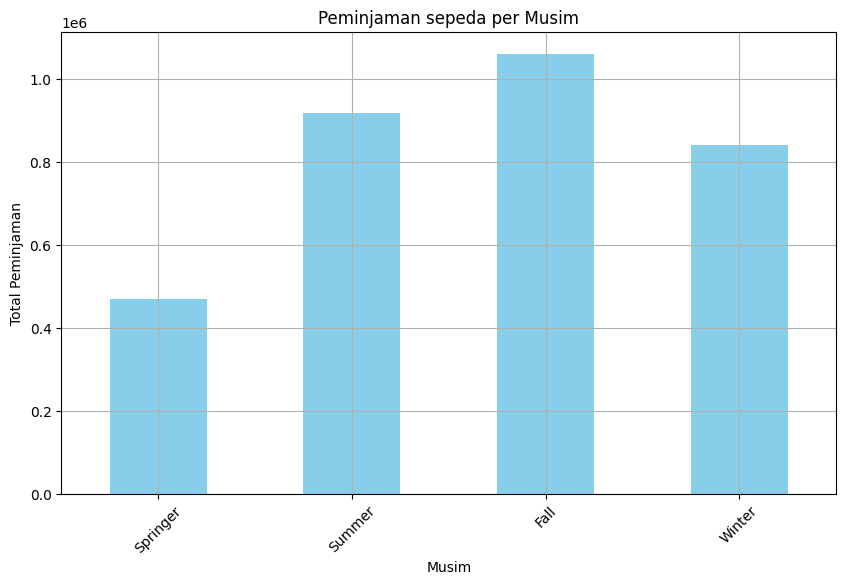

In [38]:
penjualan_permusim = data1.groupby('season')['cnt'].sum()

plt.figure(figsize=(10, 6))
penjualan_permusim.plot(kind='bar', color='skyblue')
plt.title('Peminjaman sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Total Peminjaman')
plt.xticks(range(0, 4), ['Springer', 'Summer', 'Fall', 'Winter'],rotation=45)
plt.grid(True)
plt.show()

### Pertanyaan 2: Bagaimana perbandingan peminjaman sepeda antara 2011 dan 2012

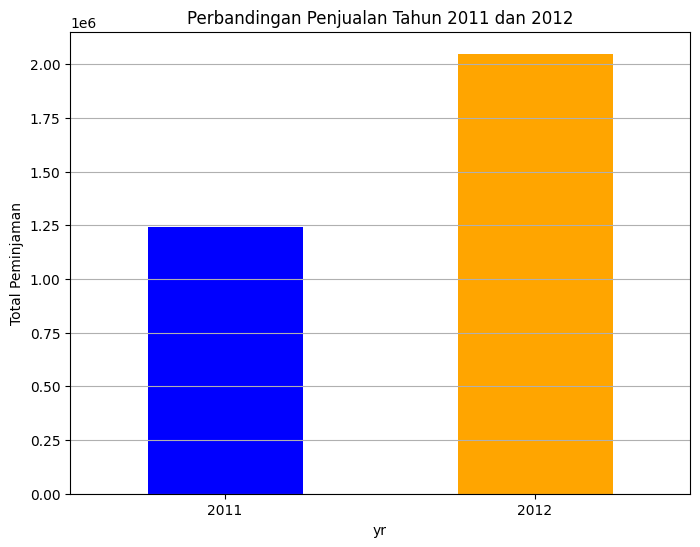

In [63]:
total_penjualan = data_day.groupby('yr')['cnt'].sum()

# Membuat bar plot
def barplot(total):
    plt.figure(figsize=(8, 6))
    total_penjualan.plot(kind='bar', color=['blue', 'orange'])
    plt.title('Perbandingan Peminjaman Tahun 2011 dan 2012')
    plt.xlabel('yr')
    plt.ylabel('Total Peminjaman')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

barplot(total_penjualan)


## Conclusion

- Conclution pertanyaan 1 : Penjualan sepeda terbanyak dalam 2 tahun yaitu 2011 dan 2012 adalah pada musim Fall atau Gugur. Paling sedikit peminjaman sepeda terdapat pada musim spring atau musim semi.


- Conclution pertanyaan 2 : Perbandingan antara tahun 2011 dan 2012 peminjaman terbanyak berada pada tahun 2012.